In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
def plot_grid(narr):
    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'aqua'
    colors[narr] = 'coral'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    cur=start
    post=[0]
    for i in range(niter):
        a=value(cur, **kwargs)
        ind=np.random.choice(8,2)
        proposed=proposal(cur, ind, **kwargs)
        a=a/value(proposed, **kwargs)
        if np.random.uniform()>a:
            cur=proposed
        else:
            cur[ind[0]][ind[1]]=0;
        post.append(int(np.sum(cur)))
    plot_grid(cur.astype('bool'))
    return post[nburn:]
def value(cur, **kwargs):
    _=kwargs
    return cur.sum()
def proposal(cur, k, **kwargs):
    _=kwargs
    k=np.random.choice(8,2)
    s=0
    if k[0]!=0:
        s+=cur[k[0]-1][k[1]]
    if k[0]!=7:
        s+=cur[k[0]+1][k[1]]
    if k[1]!=0:
        s+=cur[k[0]][k[1]-1]
    if k[1]!=7:
        s+=cur[k[0]][k[1]+1]
    if s==0:
        cur[k[0]][k[1]]=1
    else:
        cur[k[0]][k[1]]=0
    return cur
def g_test(x, start=0.5, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

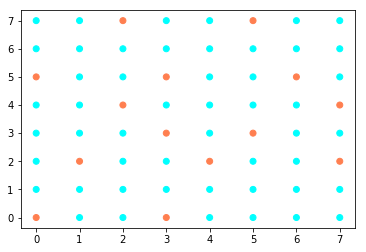

In [27]:
size = 8
post = metroplis(np.zeros((8,8)), value, proposal, 100000)

In [28]:
print("Оценка кол-ва закрашенных вершин: " + str(sum(post)/len(post)))

Оценка кол-ва закрашенных вершин: 15.208057919420806


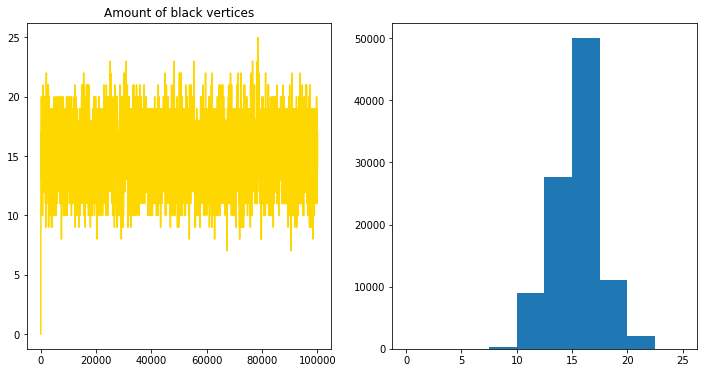

Ttest_indResult(statistic=-14.456816821906086, pvalue=8.83443999259309e-47)

In [36]:
#Вывод о стационарности можно сделать из графических и численных данных
from scipy import stats
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(post, color='gold')
plt.title("Amount of black vertices")
plt.subplot(1,2,2)
plt.hist(post)
plt.show()
g_test(post[2010:10000])